In [6]:
from queue import Queue
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [46]:
class Graph:
    def __init__(self, n, m, graph_type, adj_list=None):
        self.adj_list_ = None
        self.nodes_amount_ = None
        self.max_degree_ = None

        if graph_type == 'rectengular':
            self._create_rectengular(n, m)
        elif adj_list:
            self.adj_list_ = adj_list
            self.nodes_amount_ = len(adj_list)


    def _create_rectengular(self, n, m):
        self.adj_list_ = {}
        idx = lambda r, t: r*m + t 

        self.max_degree_ = 4
        self.nodes_amount_ = n*m  

        for i in range(0, n):
            for j in range(0, m):
                # Corner case 
                current_idx = idx(i, j) 

                neighbours = []
                if i - 1 >= 0:
                     neighbours.append(idx(i-1, j))
                if i + 1 < n:
                     neighbours.append(idx(i+1, j))
                if j - 1 >= 0:
                     neighbours.append(idx(i, j-1))
                if j + 1 < m:
                     neighbours.append(idx(i, j+1))
                
                self.adj_list_[current_idx] = neighbours
    

    def delete_vertex(self, v):
        neighbours = self.adj_list_[v]

        for neighbour in neighbours:
            self.adj_list_[neighbour].remove(v)
        
        del self.adj_list_[v]
        self.nodes_amount_ -= 1
    
    def merge_vertices(self, e, v):
        # Merge vertex e and v into vertex e
        for vertex in self.adj_list_[v]:
            if vertex not in self.adj_list_[e] and vertex != e:
                self.create_edge(e, vertex)
        
        self.delete_vertex(v)
    

    def delete_edge(self, e, v):
        self.adj_list_[e].remove(v)
        self.adj_list_[v].remove(e)
    
    def create_edge(self, e, v):
        self.adj_list_[e].append(v)
        self.adj_list_[v].append(e)

    def show(self):
        for v in self.adj_list_:
            print("Vertex->{}".format(v))
            print("Neighbours->", end=' ')
            for e in self.adj_list_[v]:
                print(e, end=' ')
            print()


    def shortest_pairwise_path(self):
        # Calculate all pairwise distances using bfs and return distance matrix
        path_distance = np.zeros(shape=(self.nodes_amount_, self.nodes_amount_))

        vertex_to_idx = {vertex: idx for idx, vertex in enumerate(self.adj_list_)}

        for current_vertex in self.adj_list_:
            parent_vertices, _ = self._bfs(current_vertex)
            for vertex in parent_vertices:
                cur_vertex_idx =  vertex_to_idx[current_vertex]
                vertex_idx = vertex_to_idx[vertex]

                if path_distance[vertex_idx, cur_vertex_idx] != 0:
                    # Symmetric matrix
                    path_distance[cur_vertex_idx, vertex_idx] = path_distance[vertex_idx, cur_vertex_idx]
                    continue

                distance = 0
                prev = vertex
                
                while prev != current_vertex:
                    prev = parent_vertices[prev]
                    distance += 1
                    
                path_distance[cur_vertex_idx, vertex_idx] = distance

        return path_distance
    
    
    def _bfs(self, vertex):
        queue = Queue()
        visited = {key: False for key in self.adj_list_}
        prev = {}

        queue.put(vertex)
        visited[vertex] = True
        
        while not queue.empty():
            node = queue.get()
            neighbours = self.adj_list_[node]

            for neighbour in neighbours:
                if not visited[neighbour]:
                    queue.put(neighbour)
                    visited[neighbour] = True
                    prev[neighbour] = node
        return prev, visited


    def color_subgraphs(self):
        subgraphs = np.full(len(self.adj_list_), -1)

        color = 0
        for idx, vertex in enumerate(self.adj_list_):
            if subgraphs[idx] == -1:
                _, visited_nodes = self._bfs(vertex)

                for visited_idx, visited in enumerate(visited_nodes.values()):
                    if visited:
                        subgraphs[visited_idx] = color
            
                color += 1
        
        return subgraphs

In [47]:
custom_adj_list = {
    0: [1, 2],
    1: [0, 2],
    2: [0, 1],
    3: [4, 5],
    4: [3, 5],
    5: [3, 4],
    6: [7, 8],
    7: [6, 8],
    8: [6, 7]
}

graph = Graph(None, None, None, adj_list=custom_adj_list)

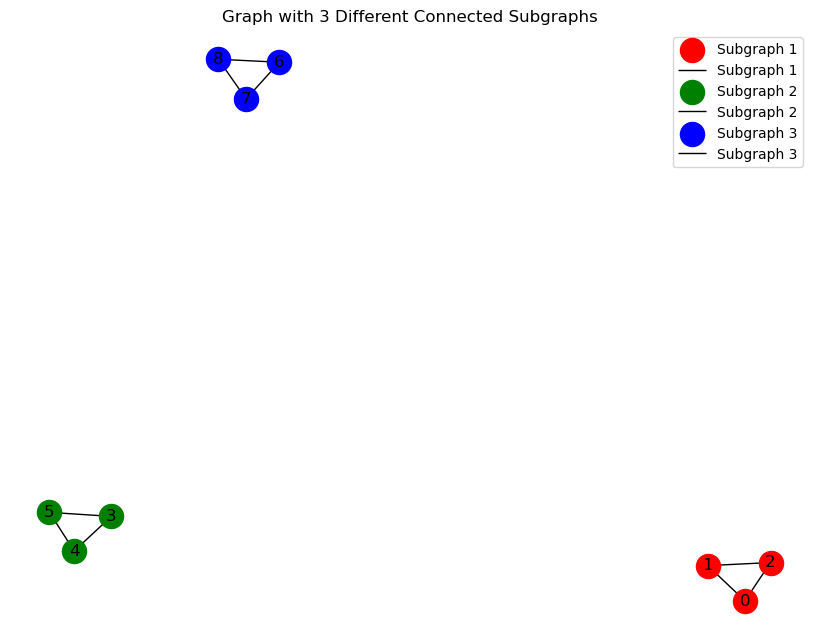

In [48]:
G = nx.Graph()

# Додавання ребер зі списку суміжності
for node, neighbors in custom_adj_list.items():
    G.add_edges_from((node, neighbor) for neighbor in neighbors)

# Розділення графа на зв'язані компоненти
connected_components = nx.connected_components(G)

# Вивід кожної зв'язної компоненти окремо
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Позиції для всіх вузлів
colors = ['r', 'g', 'b']  # Кольори для підграфів

for i, component in enumerate(connected_components):
    subgraph = G.subgraph(component)
    nx.draw(subgraph, pos, node_color=colors[i], node_size=300, with_labels=True, label=f'Subgraph {i+1}')

plt.title('Graph with 3 Different Connected Subgraphs')
plt.legend()
plt.show()

In [49]:
graph.color_subgraphs()

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [50]:
shortest_paths = graph.shortest_pairwise_path()

In [51]:
shortest_paths

array([[0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0.]])